# The numpy.random package

<br>

## Overall purpose of the numpy.random package 

***

NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

NumPy (Numerical Python) is an open source Python library that’s used in almost every field of science and engineering. It’s the universal standard for working with numerical data in Python, and it’s at the core of the scientific Python and PyData ecosystems. NumPy users include everyone from beginning coders to experienced researchers doing state-of-the-art scientific and industrial research and development. The NumPy API is used extensively in Pandas, SciPy, Matplotlib, scikit-learn, scikit-image and most other data science and scientific Python packages.

The NumPy library contains multidimensional array and matrix data structures. It provides ndarray, a homogeneous n-dimensional array object, with methods to efficiently operate on it. NumPy can be used to perform a wide variety of mathematical operations on arrays. It adds powerful data structures to Python that guarantee efficient calculations with arrays and matrices and it supplies an enormous library of high-level mathematical functions that operate on these arrays and matrices.[1]

Numpy random function is a module inside the numpy library. Random number does NOT mean a different number every time. Random means something that can not be predicted logically.Computers work on programs, and programs are definitive set of instructions. So it means there must be some algorithm to generate a random number as well.

If there is a program to generate random number it can be predicted, thus it is not truly random.

Random numbers generated through a generation algorithm are called pseudo random.

ref: https://www.bing.com/videos/search?q=numpy+random+poisson&&view=detail&mid=0F776D0CC35A1B111E920F776D0CC35A1B111E92&&FORM=VDRVRV



<br>

## Simple Random Data using the numPY package:

***

Numpy’s random number routines produce pseudo random numbers using combinations of a BitGenerator to create sequences and a Generator to use those sequences to sample from different statistical distributions.

Generators are defined on the Numpy random package API as Objects that transform sequences of random bits from a BitGenerator into sequences of numbers that follow a specific probability distribution (such as uniform, Normal or Binomial) within a specified interval.(6)

In recent months the numpy random package has made a change to their package in regards the random number genertor (RNG) and the way that seeds are generated. Previously the pseudorandom number generator used in the numpy random package was the Mersenne Twister(MT19937) algorithm.  This algorithm has been updated to use bits provided by the PCG64 (Permuted Congruential Generator) Algorithm.


By default, Generator uses bits provided by PCG64 which has better statistical properties than the legacy Mersenne Twister MT19937 used in RandomState.

In [1]:
from numpy.random import default_rng
rng = default_rng()
vals = rng.standard_normal(10)
more_vals = rng.standard_normal(10)

In [2]:
more_vals

array([ 0.49350386, -0.00297271, -0.93725297,  0.58494465,  0.28626781,
       -0.09398398,  1.02224626, -1.13874562, -0.13178544, -1.23646347])

In [3]:
vals

array([-0.87430305, -0.16918341, -1.97213005, -1.50942507,  0.359366  ,
        0.7444418 , -0.52227429, -1.51563918,  0.62709019, -0.12254647])

In [4]:
import numpy as np
from numpy import random
dir(random) # directory of all methods available in the random package of numpy

['BitGenerator',
 'Generator',
 'MT19937',
 'PCG64',
 'Philox',
 'RandomState',
 'SFC64',
 'SeedSequence',
 '__RandomState_ctor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_bounded_integers',
 '_common',
 '_generator',
 '_mt19937',
 '_pcg64',
 '_philox',
 '_pickle',
 '_sfc64',
 'beta',
 'binomial',
 'bit_generator',
 'bytes',
 'chisquare',
 'choice',
 'default_rng',
 'dirichlet',
 'exponential',
 'f',
 'gamma',
 'geometric',
 'get_state',
 'gumbel',
 'hypergeometric',
 'laplace',
 'logistic',
 'lognormal',
 'logseries',
 'mtrand',
 'multinomial',
 'multivariate_normal',
 'negative_binomial',
 'noncentral_chisquare',
 'noncentral_f',
 'normal',
 'pareto',
 'permutation',
 'poisson',
 'power',
 'rand',
 'randint',
 'randn',
 'random',
 'random_integers',
 'random_sample',
 'ranf',
 'rayleigh',
 'sample',
 'seed',
 'set_state',
 'shuffle',
 'standard_cauchy',
 'standard_exponential',
 'stand

# Simple random data function on numPY

https://numpy.org/devdocs/reference/random/generator.html

https://www.bing.com/videos/search?q=numpy+random+package&&vail&mid=1FC33C069205576E13F61FC33C069205576E13F6&iew=detrvsmid=809DCC1B5D2289AD8843809DCC1B5D2289AD8843&FORM=VDRVRV

https://www.youtube.com/watch?v=zWL3z7NMqAs&list=PLi01XoE8jYohWFPpC17Z-wWhPOSuh8Er-&index=19

The simple random data function in the numpy API refererence material lists out 4 methods. 


<br>

## Simple Random Data Method 1- Random Integers

***

The first method is the numpy.random.Generator. integers. This method will return random integers from the discrete uniform distribution of the specified dtype.
In previous documentation the numpy user would have used the code random.randint to generate this data but in the updated version we are using rng.integers

In [5]:
# Begin with importing the libraries and modules we require for using numpy on this jupyter notebook
import numpy as np
from numpy import random


# Plotting.
import matplotlib.pyplot as plt

# Numpy Random Generator intergers
rng = np.random.default_rng() # this will ensure the default generator (PCG64) is being used to generate the numbers
rng.integers(4, size=20) # if I use shift+tab here i can get a docstring to show what I need to pass into the function
# this will create a random array with numbers up to but not including 4 and the size = 20 random numbers 

array([3, 0, 0, 2, 0, 2, 3, 3, 0, 0, 0, 1, 3, 2, 3, 1, 3, 0, 2, 2],
      dtype=int64)

In [6]:
# generate a 3 x 5 array of integers between 0 and 6 inclusive:
rng.integers(7, size = (3,5))  # 3 is the number of rows 5 is the number of colums

array([[2, 4, 5, 2, 4],
       [4, 1, 4, 5, 2],
       [0, 2, 2, 0, 2]], dtype=int64)

In [7]:
# generate a 1 x 6 array with 6 upper bounds
rng.integers (1, [7,12,43,4,23,13])

array([ 6,  3, 34,  3, 13,  9], dtype=int64)

In [8]:
# Generate a 2 by 4 array using broadcasting with dtype of uint8
rng.integers([5, 7, 9, 8], [[10], [20]], dtype=np.uint8)

array([[ 9,  9,  9,  8],
       [ 8, 10, 12,  9]], dtype=uint8)

In [9]:
rng.integers(100, size= 10 ,endpoint=True)

array([52, 21, 30, 38, 38,  3, 97,  0, 80, 74], dtype=int64)

In [10]:
rng.integers(100, size = (5,5))

array([[14, 34, 11, 74, 91],
       [92, 99, 39, 77,  5],
       [39, 27,  7, 10,  9],
       [32,  8, 64, 95, 88],
       [28, 16, 31, 38,  3]], dtype=int64)

In [11]:
rng.integers (55, size =(3,5,2))# the number 3 here will denote the amount of arrays I want to generate, 5 ows and 2 columns

array([[[27,  5],
        [ 7,  3],
        [24, 30],
        [35, 34],
        [21, 19]],

       [[10, 24],
        [12,  6],
        [43, 29],
        [15,  7],
        [ 4, 20]],

       [[ 9, 25],
        [39, 34],
        [43, 40],
        [ 7,  1],
        [17,  3]]], dtype=int64)

(array([[1., 0., 1., 1., 2., 1., 1., 1., 2., 0.],
        [2., 2., 1., 0., 0., 0., 1., 1., 3., 0.],
        [0., 1., 2., 1., 0., 0., 1., 4., 1., 0.],
        [1., 0., 0., 2., 2., 0., 1., 1., 0., 3.],
        [2., 1., 0., 0., 1., 3., 2., 0., 1., 0.],
        [1., 1., 1., 0., 0., 0., 4., 0., 2., 1.],
        [2., 2., 3., 0., 0., 1., 0., 1., 0., 1.],
        [3., 1., 1., 1., 0., 2., 0., 1., 1., 0.],
        [0., 1., 1., 0., 0., 2., 0., 4., 1., 1.],
        [1., 3., 1., 0., 3., 0., 1., 0., 1., 0.]]),
 array([  7., 106., 205., 304., 403., 502., 601., 700., 799., 898., 997.]),
 <a list of 10 BarContainer objects>)

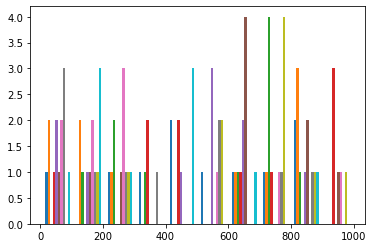

In [12]:
# lets visualise the random interger random function in numpy using the matplotlib
x= rng.integers(1000, size = (10,10))
plt.hist(x)

<br>

## Simple Random Data Method 2- numpy.random.Generator.random

***

Return random floats in the half-open interval [0.0, 1.0).

In previous versions of Numpy the code used to generate random float numbers would have been random.rand()

https://www.bing.com/videos/search?q=numpy.random.permutation&ru=%2fvideos%2fsearch%3fq%3dnumpy.random.permutation%26qs%3dOS%26form%3dQBVR%26sp%3d3%26pq%3dnumpy%2520random%2520permutation%26sk%3dHS2%26sc%3d5-24%26cvid%3dBFC1C4B64C6F46818C039948F4DFFE46&view=detail&mid=DA31CB36C9D383DD4465DA31CB36C9D383DD4465&&FORM=VDRVSR

In [13]:
rng.random() # will return a flaoting point number between 0-1

0.09769462914735727

In [14]:
rng.random((5,)) # will return a random array with five floating point numbers

array([0.52452837, 0.93031338, 0.09999789, 0.70651428, 0.31351163])

In [15]:
5*rng.random((3, 2)) - 9 #Three rows-by-two colums array of random numbers from [-9, 0):

array([[-6.24925439, -7.42615691],
       [-8.03206418, -7.580424  ],
       [-8.48671015, -7.41327251]])

In [16]:
np.random.rand(3,2) # previous coding used with the MT19937 generator 
#https://github.com/Disha-Shivale/Numpy-RandomNumber/blob/main/Numpy%20-%20Random%20number.ipynb

array([[0.13253334, 0.24067026],
       [0.48011878, 0.70544965],
       [0.30037788, 0.78293764]])

In [17]:
rng.random((3,2)) # new coding for a similiar array using the updated API reference material

array([[0.02037789, 0.85080881],
       [0.38921268, 0.80745869],
       [0.32304233, 0.16479833]])

In [18]:
# this will return a list
for i in range (10):
    print(rng.random())
    

0.09105959724102708
0.9883910243661209
0.2639339409863368
0.11426631572319779
0.7778646194546749
0.39522120200816047
0.05551422370122261
0.6168850574099929
0.5202912259061577
0.3077659580235459


In [19]:
rng.random(10)# returns an array

array([0.72361222, 0.45914973, 0.27598825, 0.90258027, 0.27531769,
       0.62298307, 0.62291386, 0.67167348, 0.45628631, 0.75330893])

In [20]:
#https://codescracker.com/python/program/python-program-generate-random-numbers.htm
randnum = rng.random()
print("Random Number =", randnum)

Random Number = 0.8521920048602473


In [21]:
print("Enter the Range: ")
start = int(input())
end = int(input())


randnum = rng.integers(start, end)
print("\nRandom Number =", randnum)

Enter the Range: 


 3
 4



Random Number = 3


In [22]:
print("Enter the Range: ")
try:
  start = int(input())
  try:
    end = int(input())
    randnum = rng.integers(start, end)
    print("\nRandom Number =", randnum)
  except ValueError:
    print("\nInvalid Input!")
except ValueError:
  print("\nInvalid Input!")

Enter the Range: 


 3
 6



Random Number = 3


In [23]:
print("Enter the Range (Interval): ")
a = int(input())
b = int(input())

if a>b:
  t = a
  a = b
  b = t

print("\nHow Many Random Numbers to Generate ? ")
tot = int(input())

randnums = []
for i in range(tot):
  randnums.append(rng.integers(a, b))

print("\nList of " +str(tot)+ " Random Numbers between " +str(a)+ " and " +str(b))
for i in range(tot):
  print(randnums[i], end=" ")
print()

Enter the Range (Interval): 


 2
 4



How Many Random Numbers to Generate ? 


 2



List of 2 Random Numbers between 2 and 4
3 2 


In [24]:
#https://realpython.com/python-random/
#One thing you might have noticed is that a majority of the functions from random return a 
#scalar value (a single int, float, or other object). If you wanted to generate a sequence of random numbers,
#one way to achieve that would be with a Python list comprehension:

[rng.random() for _ in range(5)]


[0.2738631277651511,
 0.587916082409491,
 0.12330948926482665,
 0.8294663697137468,
 0.6609689089820978]

<br>

### Simple Random Data Method 3- Choice Method

***

The NumPy random choice() function is used to gets the random samples of a one-dimensional array which returns as the random samples of NumPy array. The NumPy random choice() function is a built-in function in the NumPy package of python. The NumPy random choice() function generate random samples which are commonly used in data statistics, data analysis, data-related fields, and all and also can be used in probability, machine learning, Bayesian statistics, and all.

https://www.educba.com/numpy-random-choice/
https://www.codeleaks.io/numpy-random-choice-python/

In [25]:
#Generate a uniform random sample from np.arange(5) of size 3:
rng.choice(5, 3)

array([0, 2, 2], dtype=int64)

In [26]:
#Generate a non-uniform random sample from np.arange(5) of size 3:
rng.choice(5, 3, p=[0.1, 0, 0.3, 0.6, 0])

array([3, 3, 3], dtype=int64)

In [27]:
list_movie = [ 'The Godfather', 'The Shawshank Redemption', 'The Wizard of Oz', 'Citizen Kane', 'Pulp Fiction' ] # Using choice() method of random class
rng.choice( list_movie, size = 3, replace = False )

array(['Pulp Fiction', 'The Wizard of Oz', 'The Godfather'], dtype='<U24')

In [28]:
colours = ["green", "red", "yellow","black","orange"]

results = rng.choice (colours)

results

'black'

In [29]:
colours = ["green", "red", "yellow","black","orange"]
#Setting user-specified probabilities through p uses a more general but less efficient sampler than the default. 
#The general sampler produces a different sample than the optimized sampler even if each element of p is 1 / len(a).
rng.choice(colours, 5, p=[0.5, 0.1, 0.1, 0.2,0.1])


array(['black', 'green', 'red', 'black', 'green'], dtype='<U6')

In [30]:
np.random.default_rng().bytes(200)

b'\xbc\x90\xedKb7\xb2\n\x90\x12p;\xa7\xec\x86Wy\xe8\xd7`\x8c\xd7c\x19\x80\xd6\xb9\xf1\xb7\x0bj\xd4m\xc5\x97\xa4\x8a\xdc\xc1\xbf\xedx\x0bg,\x1c0t\x89\xb6\xab\xb2\x80:\xf2r\xd3Y\xf0\x9b\xb2\xad-\xce\xbd\xcd\xfb(\x80o\xc5\xabd\x85[{u\x878\xfa\xe4g}\\\x1a&\xc6(\xb0J\xae\xfd\x7f\xfas@\xd8\xceqA\x8d5@E\x93\x14\xd5t\xc0\xd4j2\x83\xfd\x83\xbf\xd2)\x89\xbf\x07\xa3\xc0\xcel\xdc\\\x1c\x8a"^\xac\x16\xc8pp(\x97\xa9\xcb\xe0O\x08d\x85}\x88\xf2\x06\x87Zw\x874Z\xc5\\\x12\x9eHt\xab(\xefC\xdb\xe7\x13\xff\xe7\xbb)P\x00\x9b\x13\x16p\x1f\xb9\x81\x1a\x91B>\xbe\x0f\xfa\x1cH#\xb0k*\xec\xef\x98X\x1f\xef'

In [31]:
import os
os.urandom(3)

b')\xb5D'

In [32]:
rng.random()

0.560110446202883

In [33]:
type(rng.random())

float

In [34]:
rng.random((5,))

array([0.88498269, 0.09840739, 0.62735879, 0.28066901, 0.99505778])

In [35]:
5 * rng.random((3, 2)) - 5
#Three-by-two array of random numbers from [-5, 0):

array([[-3.39317607, -3.17040737],
       [-3.22639232, -2.11756149],
       [-1.18970605, -2.32424376]])

In [36]:
rng.choice(5, 3)
##This is equivalent to rng.integers(0,5,3)
#Generate a uniform random sample from np.arange(5) of size 3:

array([1, 1, 3], dtype=int64)

In [37]:
#Generate a non-uniform random sample from np.arange(5) of size 3:
rng.choice(5, 3, p=[0.1, 0, 0.3, 0.6, 0])


array([3, 2, 2], dtype=int64)

In [38]:
#Generate a uniform random sample from np.arange(5) of size 3 without replacement:
rng.choice(5, 3, replace=False)
#This is equivalent to rng.permutation(np.arange(5))[:3]

array([3, 0, 4], dtype=int64)

In [39]:
#Generate a uniform random sample from a 2-D array along the first axis (the default), without replacement:
rng.choice([[0, 1, 2], [3, 4, 5], [6, 7, 8]], 2, replace=False)

array([[0, 1, 2],
       [6, 7, 8]])

In [40]:
names= ['pooh', 'rabbit', 'piglet', 'Peppa']
rng.choice(names, 5, p=[0.5, 0.1, 0.1, 0.3])


array(['pooh', 'Peppa', 'Peppa', 'pooh', 'pooh'], dtype='<U6')

In [41]:
rng.random()
#draw a number between 0 and 1 
# A Bernouli Trial :In the theory of probability and statistics, a Bernoulli trial (or binomial trial) is a random experiment with 
#exactly two possible outcomes, "success" and "failure", in which the probability of success is the same every time the experiment is conducted.

0.7948761334237296

#### Using a for loop to repeat the four flips over and over again

We need to initialize the number to zero and then do 10,000 repeats of the 4 flip trials 

In [42]:
n_all_heads = 0
for _ in range (10000):
    heads =rng.random(size=4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        n_all_heads += 1
        
n_all_heads / 10000

# probability of getting all four heads in all flips

0.0571

<br>

## Permutation Functions in NumPy:

***

REF: https://numpy.org/devdocs/reference/random/generator.html

The methods for randomly permuting a sequence are

shuffle(x[, axis]): Modify an array or sequence in-place by shuffling its contents.

permutation(x[, axis]):Randomly permute a sequence, or return a permuted range.

permuted(x[, axis, out]): Randomly permute x along axis axis.
A permutation refers to an arrangement of elements. e.g. [3, 2, 1] is a permutation of [1, 2, 3] and vice-versa.

The NumPy Random module provides two methods for this: shuffle() and permutation().[4]

The main difference between Generator.shuffle and Generator.permutation is that Generator.shuffle operates in-place, while Generator.permutation returns a copy.

By default, Generator.permuted returns a copy. To operate in-place with Generator.permuted, pass the same array as the first argument and as the value of the out parameter.

In [43]:
rng = np.random.default_rng()
x = np.arange(0, 15).reshape(3, 5)
x


array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [44]:
y = rng.permuted(x, axis=1, out=x)


In [45]:
x

array([[ 0,  3,  1,  4,  2],
       [ 9,  6,  8,  5,  7],
       [13, 11, 14, 12, 10]])

In [46]:
y # this is the same output for x and y. 

array([[ 0,  3,  1,  4,  2],
       [ 9,  6,  8,  5,  7],
       [13, 11, 14, 12, 10]])

In [47]:
y is x

True

Handling the axis parameter
An important distinction for these methods is how they handle the axis parameter. Both Generator.shuffle and Generator.permutation treat the input as a one-dimensional sequence, and the axis parameter determines which dimension of the input array to use as the sequence. In the case of a two-dimensional array, axis=0 will, in effect, rearrange the rows of the array, and axis=1 will rearrange the columns. 

In [48]:
rng = np.random.default_rng()
x = np.arange(0, 15).reshape(3, 5)
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [49]:
rng.permutation(x, axis=1)

array([[ 3,  4,  0,  2,  1],
       [ 8,  9,  5,  7,  6],
       [13, 14, 10, 12, 11]])

In [50]:
rng.permutation(x, axis=0) #axis = 0 has rearranged the rows while axis = 1 will rearrange the columns. The columss have been rearranged in bulk
#values within the columns have not changed 

array([[ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [ 0,  1,  2,  3,  4]])

The method Generator.permuted treats the axis parameter similar to how numpy.sort treats it. Each slice along the given axis is shuffled independently of the others. Compare the following example of the use of Generator.permuted to the above example of Generator.permutation:

In [51]:
rng.permuted(x, axis=1)

array([[ 2,  0,  3,  4,  1],
       [ 6,  9,  8,  5,  7],
       [14, 11, 12, 13, 10]])

In [52]:
#https://www.pythonpool.com/numpy-random-permutation/
result = rng.permutation(9) #pass a number in as an argument for the function 
result # returns 9 integer values in an array up to the value 9 

array([2, 8, 7, 1, 3, 6, 4, 0, 5])

In [53]:
arr= [2,5,9,8,6,8,9]
result = rng.permutation(arr)
result # input is an array the output is a permuted array of the numbers 

array([9, 2, 8, 5, 6, 9, 8])

In [54]:
arr = np.arange(16).reshape((4,4))
result = rng.permutation(arr)
result # everytime you run the code you will get a different array 

array([[12, 13, 14, 15],
       [ 4,  5,  6,  7],
       [ 0,  1,  2,  3],
       [ 8,  9, 10, 11]])

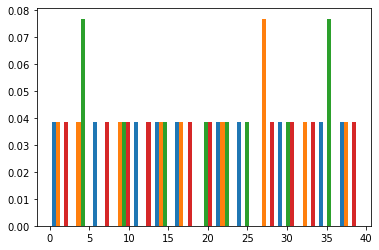

In [55]:
arr1 = np.arange(40). reshape((10,4))
arr = rng.permuted(arr1, axis=1)
c,bin, ig =plt.hist(arr, 15, density =True)
plt.show()

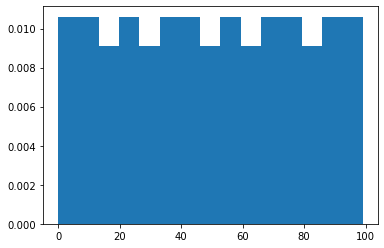

In [56]:
arr = np.random.permutation(100)
   
c, bin, ig = plt.hist(arr, 15, density = True)
plt.show()

In [57]:
#https://www.bing.com/videos/search?q=numpy.random.permutation&&view=detail&mid=00F62AB43A84335434AB00F62AB43A84335434AB&&FORM=VRDGAR&ru=%2Fvideos%2Fsearch%3Fq%3Dnumpy.random.permutation%26qs%3DOS%26form%3DQBVR%26sp%3D3%26pq%3Dnumpy%2520random%2520permutation%26sk%3DHS2%26sc%3D5-24%26cvid%3DBFC1C4B64C6F46818C039948F4DFFE46
#using the permutation function with pandas module
import pandas as pd


In [58]:
raw_data = {"county": ["Cavan", "Meath","Leitrim","Dublin","Kildare","Louth"], "Rank": ["1st","2nd","3rd","4th","5th","6th"], "CovidCases":["26","99","45","189","145","99"]
            , "CovidDeaths": ["2","4","1","20","12","8"]}

df= pd.DataFrame(raw_data, index = pd.Index (["A","B","C","D","E","F",], name = "letter"),
                columns = pd.Index (["county","Rank","CovidCases","CovidDeaths"], name = "attributes"))

In [59]:
df

attributes,county,Rank,CovidCases,CovidDeaths
letter,,,,
A,Cavan,1st,26,2
B,Meath,2nd,99,4
C,Leitrim,3rd,45,1
D,Dublin,4th,189,20
E,Kildare,5th,145,12
F,Louth,6th,99,8


In [60]:
nrows= df.shape[0] # this will give us back the number of rows

In [61]:
b = rng.permutation (nrows)

In [62]:
b # will give back a permutated sequence of the number of rows in an array

array([0, 1, 5, 4, 2, 3])

In [63]:
df.take(b) # takes the indices and changes the orders of the rows to the indices that we pass it

attributes,county,Rank,CovidCases,CovidDeaths
letter,,,,
A,Cavan,1st,26,2
B,Meath,2nd,99,4
F,Louth,6th,99,8
E,Kildare,5th,145,12
C,Leitrim,3rd,45,1
D,Dublin,4th,189,20


In [64]:
df.index

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object', name='letter')

In [65]:
#we can randomize this list of letters 
rng.permutation(df.index)

array(['A', 'B', 'E', 'C', 'F', 'D'], dtype=object)

In [66]:
df.reindex(rng.permutation(df.index))

attributes,county,Rank,CovidCases,CovidDeaths
letter,,,,
D,Dublin,4th,189,20
F,Louth,6th,99,8
E,Kildare,5th,145,12
A,Cavan,1st,26,2
C,Leitrim,3rd,45,1
B,Meath,2nd,99,4


In [67]:
df.sample(n=nrows)

attributes,county,Rank,CovidCases,CovidDeaths
letter,,,,
A,Cavan,1st,26,2
B,Meath,2nd,99,4
D,Dublin,4th,189,20
F,Louth,6th,99,8
E,Kildare,5th,145,12
C,Leitrim,3rd,45,1


In [68]:
s = df['county']
len(s) #length of city coulumn

6

In [69]:
rng.permutation(len(s))

array([0, 3, 5, 1, 4, 2])

In [70]:
r_entries=rng.permutation(len(s))

In [71]:
df

attributes,county,Rank,CovidCases,CovidDeaths
letter,,,,
A,Cavan,1st,26,2
B,Meath,2nd,99,4
C,Leitrim,3rd,45,1
D,Dublin,4th,189,20
E,Kildare,5th,145,12
F,Louth,6th,99,8


In [72]:
s[r_entries]

letter
B      Meath
E    Kildare
F      Louth
A      Cavan
D     Dublin
C    Leitrim
Name: county, dtype: object

In [73]:
s[r_entries].values

array(['Meath', 'Kildare', 'Louth', 'Cavan', 'Dublin', 'Leitrim'],
      dtype=object)

In [74]:
df['county']=s[r_entries].values

In [75]:
df #you can see now the county column has been randomised 

attributes,county,Rank,CovidCases,CovidDeaths
letter,,,,
A,Meath,1st,26,2
B,Kildare,2nd,99,4
C,Louth,3rd,45,1
D,Cavan,4th,189,20
E,Dublin,5th,145,12
F,Leitrim,6th,99,8





Generator.shuffle works on non-NumPy sequences. That is, if it is given a sequence that is not a NumPy array, it shuffles that sequence in-place.

In [76]:
rng = np.random.default_rng()
a = ['A', 'B', 'C', 'D', 'E']
rng.shuffle(a)
a


['C', 'B', 'E', 'D', 'A']

In [77]:
#https://appdividend.com/2020/06/04/numpy-random-shuffle-method-in-python/#:~:text=Numpy%20random%20shuffle%20%28%29%20The%20random.shuffle%20%28%29%20method,returns%20the%20modified%20form%20of%20the%20original%20sequence.

# Making a list of integers
samples = [10, 20, 30, 40, 50, 60]

# Converting  the list into a numpy array
seq = np.array(samples)

# Printing content of original sequence
print("Original order of the sequence is :", seq)

# Performing shuffling operation
rng.shuffle(seq)

# Printing the content of sequence after shuffling
print("\nOutput sequence obtained after shuffling is: ", seq)

Original order of the sequence is : [10 20 30 40 50 60]

Output sequence obtained after shuffling is:  [60 40 50 30 20 10]


In [78]:
# Making original sequence of multi-dimensional array
seq = np.array([[9, 8, 7], [6, 5, 4], [3, 2, 1]])

# Printing the shape of multi-dimensional array
print("Shape of original sequence is: ", seq.shape)

# Printing content of original sequence
print("Original order of the sequence is :", seq)

# Performing shuffling operation
rng.shuffle(seq)

# Printing the content of sequence after shuffling
print("\nOutput sequence obtained after shuffling is: ", seq)
print("Shape of shuffled sequence is: ", seq.shape)

Shape of original sequence is:  (3, 3)
Original order of the sequence is : [[9 8 7]
 [6 5 4]
 [3 2 1]]

Output sequence obtained after shuffling is:  [[6 5 4]
 [9 8 7]
 [3 2 1]]
Shape of shuffled sequence is:  (3, 3)


In [79]:
#Let us pass a 3-dimensional array to the rng.shuffle method.
#https://www.blogarama.com/technology-blogs/1302264-likegeeks-blog/38775926-amazing-numpy-shuffle-examples
x = 5 * rng.random((4,3,3)) - 100

print(f"x:\n{x}\n")

rng.shuffle(x) 

print(f"shuffled x:\n{x}")

x:
[[[-97.10110388 -98.93441621 -97.34416598]
  [-95.0113642  -97.26014649 -99.57460327]
  [-95.62767971 -97.26428434 -95.52828615]]

 [[-95.9438474  -95.84886066 -96.45751785]
  [-96.30279174 -97.60653343 -97.40913944]
  [-98.92866276 -99.54108441 -96.26541762]]

 [[-99.77666095 -99.22589594 -95.35631695]
  [-99.52473189 -96.26788486 -95.71869356]
  [-98.9756453  -96.97733338 -99.10251192]]

 [[-97.12153209 -95.02241007 -95.13107645]
  [-95.22536568 -98.37279701 -98.64997821]
  [-99.95900283 -96.5966092  -99.10386108]]]

shuffled x:
[[[-97.12153209 -95.02241007 -95.13107645]
  [-95.22536568 -98.37279701 -98.64997821]
  [-99.95900283 -96.5966092  -99.10386108]]

 [[-99.77666095 -99.22589594 -95.35631695]
  [-99.52473189 -96.26788486 -95.71869356]
  [-98.9756453  -96.97733338 -99.10251192]]

 [[-97.10110388 -98.93441621 -97.34416598]
  [-95.0113642  -97.26014649 -99.57460327]
  [-95.62767971 -97.26428434 -95.52828615]]

 [[-95.9438474  -95.84886066 -96.45751785]
  [-96.30279174 -97.6065

<br>

## Probability Distributions 

***
Probability distributions are statistical functions that describe the likelihood of obtaining possible values that a random variable can take. In other words, the values of the variable vary based on the underlying probability distribution.

Suppose you draw a random sample and measure the heights of the subjects. As you measure heights, you create a distribution of heights. This type of distribution is useful when you need to know which outcomes are most likely, the spread of potential values, and the likelihood of different results.

Probability distributions indicate the likelihood of an event or outcome. Statisticians use the following notation to describe probabilities:

p(x) = the likelihood that random variable takes a specific value of x.

The sum of all probabilities for all possible values must equal 1. Furthermore, the probability for a particular value or range of values must be between 0 and 1.

Probability distributions describe the dispersion of the values of a random variable. Consequently, the kind of variable determines the type of probability distribution. For a single random variable, statisticians divide distributions into the following two types:

1) Discrete probability distributions for discrete variables
There are a variety of discrete probability distributions that you can use to model different types of data. The correct discrete distribution depends on the properties of your data. For example, use the:

Binomial distribution to model binary data, such as coin tosses.
Poisson distribution to model count data, such as the count of library book checkouts per hour.
Uniform distribution to model multiple events with the same probability, such as rolling a die.

2) Probability density functions for continuous variables

Continuous probability functions are also known as probability density functions. You know that you have a continuous distribution if the variable can assume an infinite number of values between any two values. 

There are a variety of probability distributions for continuous data. These distributions include the following:
- The most well-known continuous distribution is the normal distribution, which is also known as the Gaussian distribution or the “bell curve.” This symmetric distribution fits a wide variety of phenomena, such as human height and IQ scores. It has two parameters—the mean and the standard deviation
- Weibull distribution: A particularly versatile distribution that analysts use in many settings. Can model left- and right-skewed data and approximate the normal distribution.
- Exponential distribution: Models variables in which small values occur more frequently than higher values. Use to model the amount of time between independent events.
- Gamma distribution: Models right-skewed distributions. Use to model the time until the kth event, where k is the shape parameter.
- Uniform distribution: Models symmetric, continuous data where all equal sized ranges have the same probability.

You can use equations and tables of variable values and probabilities to represent a probability distribution. 


<br>

### Binomial Distributions

***

Binomial Distribution is a discrete probability distribution and it expresses the probability of a given number of successes in a sequence of n independent experiments with a known probability of success on each trial.

The **probability mass function (pmf)** of binomial distribution is defined as:

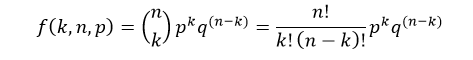


Binomial Distribution
Where,
- p is the probability of success in each trial
- q is the probability of failure in each trial, q = 1 - p
- n is number of trials
- k is the number of successes which can occur anywhere among the n trials

An binomial distribution has mean np and variance npq.

The cumulative distribution function (cdf) evaluated at k, is the probability that the random variable (X) will take a value less than or equal to k. The cdf of binomial distribution is defined as:
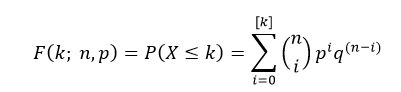



Where, [k] is the greatest integer less than or equal to k.

The NumPy random.binomial() function returns random samples from a binomial distribution.

In [80]:
#https://www.alphacodingskills.com/numpy/numpy-binomial-distribution.php

size = (5,3)

sample = rng.binomial(20, 0.5, size)
sample

array([[10, 12, 13],
       [13, 10,  9],
       [11, 12,  8],
       [16, 12,  8],
       [15, 11, 13]], dtype=int64)

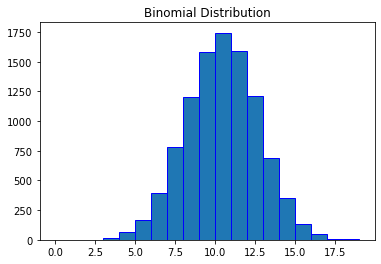

In [81]:
#fixing the seed for reproducibility
#of the result
np.random.seed(10)

size = 10000
#drawing 10000 sample from 
#binomial distribution
sample = np.random.binomial(20, 0.5, size)
bin = np.arange(0,20,1)

plt.hist(sample, bins=bin, edgecolor='blue') 
plt.title("Binomial Distribution") 
plt.show()

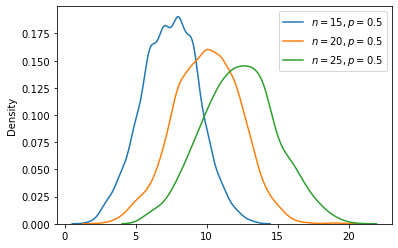

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#fixing the seed for reproducibility
#of the result
np.random.seed(10)

size = 1000
#plotting 1000 sample from 
#different binomial distribution
sns.kdeplot(np.random.binomial(15, 0.5, size))
sns.kdeplot(np.random.binomial(20, 0.5, size))
sns.kdeplot(np.random.binomial(25, 0.5, size))

plt.legend(["$n = 15, p = 0.5$", 
            "$n = 20, p = 0.5$", 
            "$n = 25, p = 0.5$"])
plt.show()

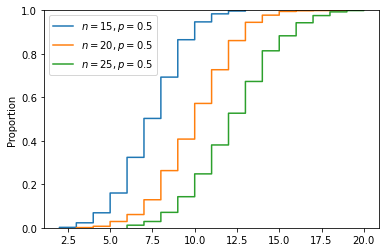

In [83]:
#fixing the seed for reproducibility
#of the result
np.random.seed(10)

size = 1000
#plotting 1000 sample from 
#different binomial distribution
sns.ecdfplot(np.random.binomial(15, 0.5, size))
sns.ecdfplot(np.random.binomial(20, 0.5, size))
sns.ecdfplot(np.random.binomial(25, 0.5, size))

plt.legend(["$n = 15, p = 0.5$", 
            "$n = 20, p = 0.5$", 
            "$n = 25, p = 0.5$"])
plt.show()

In [84]:
rng = np.random.default_rng()
n, p = 10, .5  # number of trials, probability of each trial
s = rng.binomial(n, p, 1000)
s

array([6, 5, 5, 4, 7, 7, 4, 4, 7, 3, 6, 5, 7, 5, 5, 3, 6, 6, 7, 4, 3, 6,
       3, 2, 6, 5, 5, 4, 5, 6, 4, 7, 4, 4, 5, 2, 5, 5, 7, 6, 5, 5, 6, 3,
       4, 5, 6, 3, 6, 6, 5, 7, 5, 4, 4, 4, 5, 6, 4, 6, 6, 7, 5, 4, 6, 5,
       5, 5, 5, 6, 8, 4, 7, 5, 5, 3, 4, 4, 4, 5, 3, 8, 7, 5, 3, 5, 4, 8,
       7, 3, 4, 6, 3, 5, 4, 2, 7, 4, 4, 6, 6, 7, 7, 4, 6, 8, 4, 7, 4, 4,
       4, 6, 4, 5, 4, 3, 5, 6, 7, 6, 5, 5, 6, 7, 4, 7, 5, 4, 5, 6, 7, 5,
       5, 2, 5, 4, 5, 4, 3, 7, 3, 4, 4, 4, 3, 7, 5, 2, 6, 2, 6, 4, 6, 6,
       5, 5, 9, 4, 4, 3, 5, 4, 4, 3, 5, 7, 7, 4, 3, 7, 5, 2, 6, 5, 3, 4,
       7, 7, 6, 6, 5, 7, 5, 7, 5, 4, 4, 4, 6, 6, 5, 5, 2, 4, 7, 8, 3, 3,
       1, 7, 6, 3, 5, 5, 6, 6, 8, 5, 7, 5, 5, 5, 3, 5, 6, 5, 5, 4, 3, 6,
       2, 7, 6, 4, 6, 5, 5, 6, 5, 5, 7, 4, 6, 4, 3, 5, 6, 7, 5, 7, 5, 2,
       3, 4, 1, 6, 5, 6, 7, 6, 8, 3, 5, 8, 5, 5, 8, 5, 5, 8, 4, 4, 5, 3,
       5, 5, 6, 4, 5, 4, 9, 4, 4, 2, 3, 5, 8, 4, 6, 3, 5, 6, 7, 2, 2, 2,
       6, 7, 7, 5, 5, 4, 6, 6, 6, 5, 6, 6, 5, 6, 4,

How to Work a Binomial Distribution Formula:

80% of people who purchase pet insurance are women.  If 9 pet insurance owners are randomly selected, find the probability that exactly 6 are women.



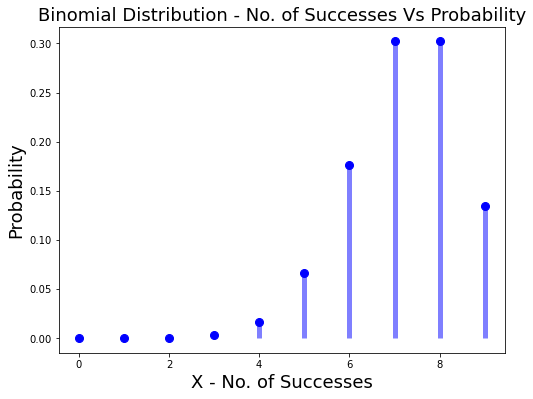

In [85]:
#https://vitalflux.com/binomial-distribution-with-python-code-examples/
#https://vitalflux.com/binomial-distribution-defined-with-10-examples/
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np
#
# X = Discrete random variable representing number of successes
# p = Probability of the success
#
X = np.arange(0,10)
p = 0.8
n = 9
#
# Calculate binomial probability distribution
#
binom_pd = binom.pmf(X, n, p)
#
# Plot the probability distribution
#
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(X, binom_pd, 'bo', ms=8, label='geom pmf')
plt.ylabel("Probability", fontsize="18")
plt.xlabel("X - No. of Successes", fontsize="18")
plt.title("Binomial Distribution - No. of Successes Vs Probability", fontsize="18")
ax.vlines(X, 0, binom_pd, colors='b', lw=5, alpha=0.5)
plt.show()

No. of correct answers from multiple-choice questions: Probability of getting right answers out of 20 multiple-choice questions when one out of 4 options were chosen arbitrarily. Here, the random variable X is the number of “successes” that is the number of right answers. Let’s say, the probability/proportion of an answer being right is 1/4 or 0.25 or 25%. The binomial distribution could be represented as B(20,0.25)

In [86]:
# ref: https://numpy.org/devdocs/reference/random/generated/numpy.random.Generator.binomial.html
n, p = 20, .25  # number of trials, probability of each trial
size = 1000
s = rng.binomial(n, p, size)

# lets check the probability of 8 answers being corrected selected in the multiple choice questioneaire and simulate the trail 20000 times
sum(rng.binomial(20, 0.25, 20000) == 8)/20000.
# there is a 0.06225% chance of 8 answers being correct or 6.225% chance

0.06195

In [87]:
#ref https://machinelearningmastery.com/discrete-probability-distributions-for-machine-learning/
# check what the ditribution is of no of answers being correct. With probability of 0.25 the average correct amount of answers is 5 out of twenty. 
# example of using the pmf for the binomial distribution
from scipy.stats import binom
# define the parameters of the distribution
p = 0.25
k = 20
# define the distribution
dist = binom(k, p)
# calculate the probability of n successes
for n in range(0, 21, 1):
	print('P of %d success: %.3f%%' % (n, dist.pmf(n)*100))

P of 0 success: 0.317%
P of 1 success: 2.114%
P of 2 success: 6.695%
P of 3 success: 13.390%
P of 4 success: 18.969%
P of 5 success: 20.233%
P of 6 success: 16.861%
P of 7 success: 11.241%
P of 8 success: 6.089%
P of 9 success: 2.706%
P of 10 success: 0.992%
P of 11 success: 0.301%
P of 12 success: 0.075%
P of 13 success: 0.015%
P of 14 success: 0.003%
P of 15 success: 0.000%
P of 16 success: 0.000%
P of 17 success: 0.000%
P of 18 success: 0.000%
P of 19 success: 0.000%
P of 20 success: 0.000%


<br>

### The Chisquare Distribution

***

When df independent random variables, each with standard normal distributions (mean 0, variance 1), are squared and summed, the resulting distribution is chi-square (see Notes). This distribution is often used in hypothesis testing.

It is used for statistical tests where the test statistic follows a Chi-squared distribution. Two common tests that rely on the Chi-square distribution are the Chi-square goodness of fit test and the Chi-square test of independence.




In [88]:
np.random.default_rng().chisquare(3,4)

array([1.6707014 , 2.19557821, 2.70541181, 2.36413267])

C:\Users\kate_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


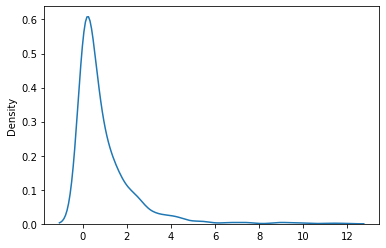

In [89]:
sns.distplot(np.random.default_rng().chisquare(df=1, size=1000), hist=False)

plt.show()

No handles with labels found to put in legend.


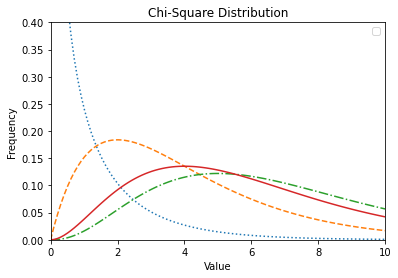

In [90]:
#https://github.com/ikhomkodes/ChiSquare-Test-in-5-different-languages/blob/main/ChiSquareTest.ipynb

from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
fig,ax = plt.subplots(1,1)

linestyles = [':', '--', '-.', '-']
deg_of_freedom = [1, 4, 7, 6]
for df, ls in zip(deg_of_freedom, linestyles):
  ax.plot(x, stats.chi2.pdf(x, df), linestyle=ls)

plt.xlim(0, 10)
plt.ylim(0, 0.4)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Chi-Square Distribution')

plt.legend()
plt.show()

In [91]:
observed_values=[300,300,100,200,100]
expected_values= [600, 210, 140, 30, 20]
t = stats.chisquare([300,300,100,200,100],f_exp= [600, 210, 140, 30, 20])
print("Chisquare is",t)

Chisquare is Power_divergenceResult(statistic=1483.3333333333333, pvalue=0.0)


In [92]:
#https://wtmatter.com/numpy-chi-square-distribution/
#https://www.geeksforgeeks.org/numpy-random-chisquare-in-python/
#ref:https://github.com/BundleOfKent/Pearson-s-chi-squared-test-from-scratch/blob/master/Chi-squaredFromScratch_Medium.ipynb
#ref: https://python-bloggers.com/2020/09/how-to-run-chi-square-test-in-python/
# ref:https://medium.com/analytics-vidhya/pearsons-chi-squared-test-from-scratch-with-python-ba9e14d336c
#https://github.com/funkaj1981/chisquare_function/blob/master/chi2.ipynb
# https://allusesof.com/math/20-uses-of-the-chi-square-test/

<br>


### The Normal Distribution in Numpy Random:

***


The NumPy random normal() function is used to gets the random samples from a normal distribution. The NumPy random normal() function is a built-in function in NumPy package of python. The NumPy random normal() function generate random samples from a normal distribution or Gaussian distribution, the normal distribution describes a common occurring distribution of samples influenced by a large of tiny, random distribution or which occurs often in nature. The normal distribution also called a bell curve because of its shape and these samples of distribution are commonly used in data statistics, data analysis, data-related fields, and all and also can be used in probability, machine learning, Bayesian statistics, and all. It is the most important distribution.




In [93]:
help(random.Generator.normal)
# this code will tell me about the parameters,returns and also includes some examples to practice with.

Help on method_descriptor:

normal(...)
    normal(loc=0.0, scale=1.0, size=None)
    
    Draw random samples from a normal (Gaussian) distribution.
    
    The probability density function of the normal distribution, first
    derived by De Moivre and 200 years later by both Gauss and Laplace
    independently [2]_, is often called the bell curve because of
    its characteristic shape (see the example below).
    
    The normal distributions occurs often in nature.  For example, it
    describes the commonly occurring distribution of samples influenced
    by a large number of tiny, random disturbances, each with its own
    unique distribution [2]_.
    
    Parameters
    ----------
    loc : float or array_like of floats
        Mean ("centre") of the distribution.
    scale : float or array_like of floats
        Standard deviation (spread or "width") of the distribution. Must be
        non-negative.
    size : int or tuple of ints, optional
        Output shape.  If the give

In [94]:
3 + 2.5 * np.random.standard_normal(size=(2, 4))

array([[0.02025416, 7.55529275, 4.98894105, 8.00939977],
       [0.84043725, 6.78050827, 0.12837609, 2.2769493 ]])

In [95]:
dir(random.Generator.normal)
# this command will let me see what is in the random normal directory in numpy 

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__name__',
 '__ne__',
 '__new__',
 '__objclass__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__text_signature__']

C:\Users\kate_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


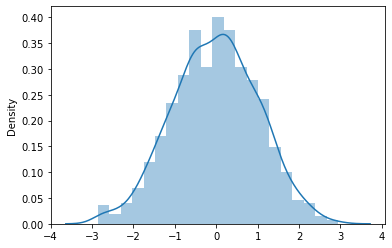

In [96]:
sns.distplot(np.random.standard_normal(size=1000), hist=True)

plt.show()

In [97]:
 

The np.random.normal function has three primary parameters that control the output: loc, scale, and size.
The loc parameter controls the mean of the function.
The scale parameter controls the standard deviation of the normal distribution.
The size parameter controls the size and shape of the output.


SyntaxError: invalid syntax (<ipython-input-97-8b4103477db3>, line 1)

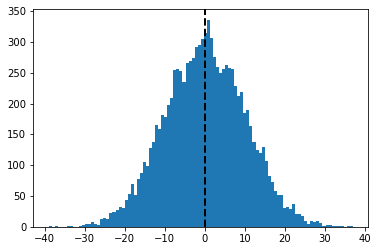

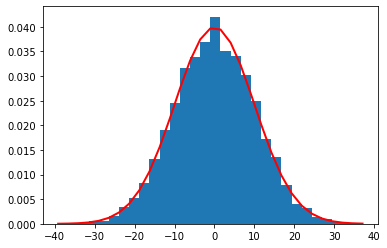

In [98]:
# mean
pos = 0
 
# standard deviation
scale = 10
 
# size number of points
size = 10000 
 
 
# random seed
np.random.seed(10)
 
# creating a normal distribution data
values = np.random.default_rng().normal(pos, scale ,size)
 
# plotting histograph
plt.hist(values, 100)
 
# plotting mean line
plt.axvline(values.mean(), color='k', linestyle='dashed', linewidth=2)
 
# showing the plot
plt.show()
# Display the histogram of the samples, along with the probability density function:
count, bins, ignored = plt.hist(values, 30, density=True)
plt.plot(bins, 1/(scale * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - pos)**2 / (2 * scale**2) ),
         linewidth=2, color='r')
plt.show()


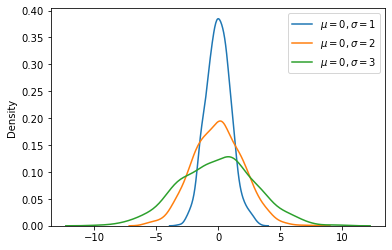

In [99]:
#https://www.alphacodingskills.com/numpy/numpy-normal-distribution.php
#Multiple probability density functions can be compared graphically using Seaborn kdeplot() function. 
#In the example below, pdf of three normal distributions (each with mean 0 and standard deviation 1, 2 and 3 respectively) are compared.
# The below is code for normal distribution with the same mean but difference in standard deviation
#fixing the seed for reproducibility
#of the result
np.random.seed(10)

size = 1000
#plotting 1000 sample from 
#different normal distribution
sns.kdeplot(np.random.default_rng().normal(0, 1, size))
sns.kdeplot(np.random.default_rng().normal(0, 2, size))
sns.kdeplot(np.random.default_rng().normal(0, 3, size))

plt.legend([r"$\mu = 0, \sigma = 1$", 
            r"$\mu = 0, \sigma = 2$", 
            r"$\mu = 0, \sigma = 3$"])
plt.show()

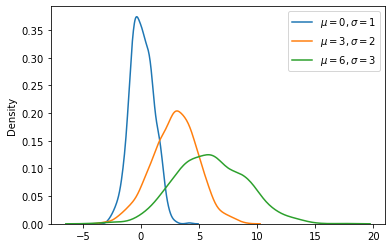

In [100]:
#Three normal distributions each with different mean and standard deviations are graphically compared.
#ref :https://www.alphacodingskills.com/numpy/numpy-normal-distribution.php

#fixing the seed for reproducibility
#of the result
np.random.seed(10)

size = 1000
#plotting 1000 sample from 
#different normal distribution
sns.kdeplot(np.random.default_rng().normal(0, 1, size))
sns.kdeplot(np.random.default_rng().normal(3, 2, size))
sns.kdeplot(np.random.default_rng().normal(6, 3, size))

plt.legend([r"$\mu = 0, \sigma = 1$", 
            r"$\mu = 3, \sigma = 2$", 
            r"$\mu = 6, \sigma = 3$"])
plt.show()

<br>

### The uniform distribution in NumPy Random:

***
In statistics, uniform distribution is a term used to describe a form of probability distribution where every possible outcome has an equal likelihood of happening. The probability is constant since each variable has equal chances of being the outcome.

Discrete uniform distributions have a finite number of outcomes. A continuous uniform distribution is a statistical distribution with an infinite number of equally likely measurable values.

The concepts of discrete uniform distribution and continuous uniform distribution, as well as the random variables they describe, are the foundations of statistical analysis and probability theory.

For example, if you stand on a street corner and start to randomly hand a $100 bill to any lucky person who walked by, then every passerby would have an equal chance of being handed the money. The percentage of the probability is 1 divided by the total number of outcomes (number of passersby). However, if you favored short people or women, they would have a higher chance of being given the $100 bill than the other passersby. It would not be described as uniform probability.

A deck of cards also has a uniform distribution. This is because an individual has an equal chance of drawing a spade, a heart, a club, or a diamond. Another example of a uniform distribution is when a coin is tossed. The likelihood of getting a tail or head is the same. The graph of a uniform distribution is usually flat, whereby the sides and top are parallel to the x- and y-axes.

1. Discrete uniform distribution
In statistics and probability theory, a discrete uniform distribution is a statistical distribution where the probability of outcomes is equally likely and with finite values. A good example of a discrete uniform distribution would be the possible outcomes of rolling a 6-sided die. The possible values would be 1, 2, 3, 4, 5, or 6. In this case, each of the six numbers has an equal chance of appearing. Therefore, each time the 6-sided die is thrown, each side has a chance of 1/6.

The number of values is finite. It is impossible to get a value of 1.3, 4.2, or 5.7 when rolling a fair die. However, if another die is added and they are both thrown, the distribution that results is no longer uniform because the probability of the sums is not equal. Another simple example is the probability distribution of a coin being flipped. The possible outcomes in such a scenario can only be two. Therefore, the finite value is 2.

There are several ways in which discrete uniform distribution can be valuable for businesses. For example, it can arise in inventory management in the study of the frequency of inventory sales. It can provide a probability distribution that can guide the business on how to properly allocate the inventory for the best use of square footage.

Discrete uniform distribution is also useful in Monte Carlo simulation. This is a modeling technique that uses programmed technology to identify the probabilities of different outcomes. Monte Carlo simulation is often used to forecast scenarios and help in the identification of risks.

 

2. Continuous uniform distribution
Not all uniform distributions are discrete; some are continuous. A continuous uniform distribution (also referred to as rectangular distribution) is a statistical distribution with an infinite number of equally likely measurable values. Unlike discrete random variables, a continuous random variable can take any real value within a specified range.

A continuous uniform distribution usually comes in a rectangular shape. A good example of a continuous uniform distribution is an idealized random number generator. With continuous uniform distribution, just like discrete uniform distribution, every variable has an equal chance of happening. However, there is an infinite number of points that can exist.

In [ ]:
# ref: https://www.investopedia.com/terms/u/uniform-distribution.asp#:~:text=Uniform%20distributions%20are%20probability%20distributions%20with%20equally%20likely,a%20continuous%20distribution%2C%20outcomes%20are%20continuous%20and%20infinite.
# ref: https://corporatefinanceinstitute.com/resources/knowledge/other/uniform-distribution/
# ref : https://www.alphacodingskills.com/numpy/numpy-uniform-distribution.php
# ref : https://wtmatter.com/numpy-uniform-distribution/
# ref: https://www.datacamp.com/community/tutorials/probability-distributions-python

In [ ]:
s = np.random.default_rng().uniform(-10,-9,100)

In [ ]:
s

In [ ]:
#All values are within the given interval:
np.all(s <= -12)

In [ ]:
np.all(s < 0)

In [ ]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

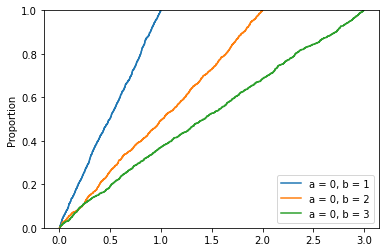

In [101]:
import seaborn as sns

#fixing the seed for reproducibility
#of the result
np.random.seed(10)

size = 1000
#plotting 1000 sample from 
#different uniform distribution
sns.ecdfplot(np.random.uniform(0, 1, size))
sns.ecdfplot(np.random.uniform(0, 2, size))
sns.ecdfplot(np.random.uniform(0, 3, size))

plt.legend(["a = 0, b = 1", 
            "a = 0, b = 2", 
            "a = 0, b = 3"])
plt.show()

C:\Users\kate_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


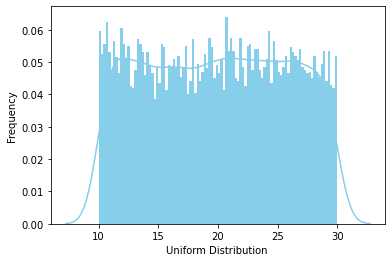

In [102]:
# import uniform distribution. We can use the scipy module which has a built in uniform function 
from scipy.stats import uniform
import seaborn as sns 

# random numbers from uniform distribution
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc = start, scale=width)

ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')
plt.show()

<br>

## The Poisson Distribution

***

Poisson Distribution is a Discrete Distribution (will only take a discrete number of values).

It estimates how many times an event can happen in a specified time. e.g. If someone eats twice a day what is probability he will eat thrice?

It has two parameters:

lam - rate or known number of occurences e.g. 2 for above problem.

size - The shape of the returned array.

Basically, it is used to predict the probability of certain events happening if we know how often the event has occurred.

(array([2., 0., 0., 2., 0., 0., 1., 0., 0., 3.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

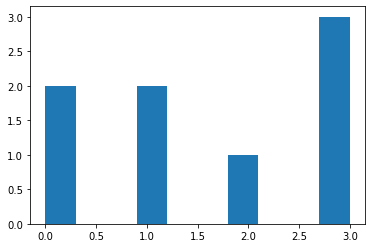

(array([ 399.,  808., 3273., 1739., 2493.,  625.,  513.,   94.,   49.,
           7.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

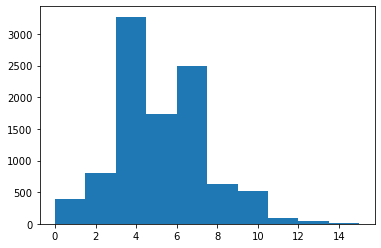

In [112]:
# generate a random 
import numpy as np
rng = np.random.default_rng()
s = rng.poisson(5, 10000)
plt.hist(s)

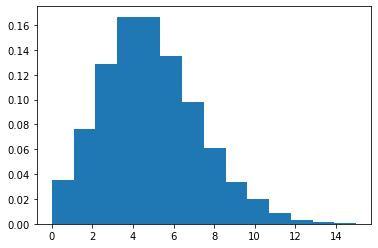

In [104]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 14, density=True)
plt.show()

C:\Users\kate_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


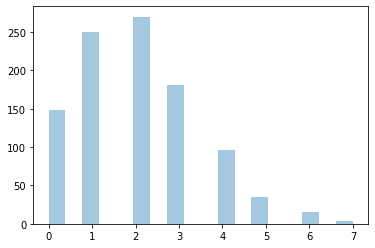

In [105]:
sns.distplot(random.poisson(lam=2, size=1000), kde=False)

plt.show()

Normal distribution is continous whereas poisson is discrete.

But we can see that similar to binomial for a large enough poisson distribution it will become similar to normal distribution with certain std dev and mean.

C:\Users\kate_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\kate_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


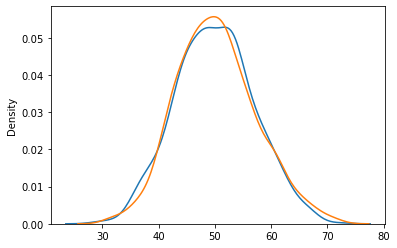

In [106]:
# ref: https://www.w3schools.com/python/numpy/numpy_random_poisson.asp
sns.distplot(random.normal(loc=50, scale=7, size=1000), hist=False, label='normal')
sns.distplot(random.poisson(lam=50, size=1000), hist=False, label='poisson')

plt.show()

Multiple cumulative distribution functions can be compared graphically using Seaborn ecdfplot() function. In the example below, cdf of three poisson distributions (each with different λ) are compared.



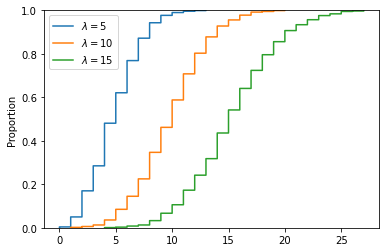

In [115]:
#ref https://www.alphacodingskills.com/numpy/numpy-poisson-distribution.php
#fixing the seed for reproducibility
#of the result
np.random.seed(10)

size = 1000
#plotting 1000 sample from 
#different poisson distribution
sns.ecdfplot(np.random.poisson(5, size))
sns.ecdfplot(np.random.poisson(10, size))
sns.ecdfplot(np.random.poisson(15, size))

plt.legend([r"$\lambda = 5$", 
            r"$\lambda = 10$", 
            r"$\lambda = 15$"])
plt.show()

Draw an equal amount of samples for two different values of lam, simultaneously. In this example, we shall be drawing 20 different sample values for two values of lam: λ = 10 and λ = 100. We will be passing lam argument in the form of (10,100).


[[ 13 104]
 [ 10  90]
 [  6 110]
 [ 12 117]
 [ 10  96]
 [  9 103]
 [ 11 110]
 [ 15  84]
 [ 10  90]
 [  8  94]
 [  8  97]
 [ 13  97]
 [ 13 103]
 [ 10  74]
 [  4  95]
 [  8  95]
 [ 14 114]
 [ 11 103]
 [  8  94]
 [ 10  99]]


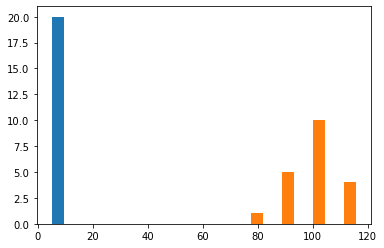

In [117]:
#ref: https://www.pythonpool.com/numpy-random-poisson/
np.random.seed(10)
k = np.random.poisson((10, 100), (20,2))

print(k)

plt.hist(k)

plt.show()

https://www.investopedia.com/terms/p/poisson-distribution.asp

## Backround Information on NumPy (5)

https://www.youtube.com/watch?v=ZB7BZMhfPgk Introduction to Numerical Computing with NumPy | SciPy 2019 Tutorial 1.13.00


### References:
[1](https://numpy.org/devdocs/user/whatisnumpy.html)
[2](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html)
[3](https://www.datacamp.com/community/tutorials/numpy-random)
[4](https://www.w3schools.com/python/numpy/numpy_random_permutation.asp)
[5](https://www.youtube.com/watch?v=ZB7BZMhfPgk)
[6](https://numpy.org/devdocs/reference/random/index.html)